# Final Project 
## Fútbol vs. Football 
### By: DEL

# Abstract

This is my Big Data final project, the biggest thing I will be looking at is the salaries from NFL football players and MLS soccer players. Looking at the datasets I see that both have guaranteed aspects of the salaries. It would also be interesting to look at guaranteed compensations. I also want to look at the salary caps for teams in each league. 

Some questions I am looking to answer in this final project: 

* Who is the highest paid player in the MLS?
* Who is the lowest paid player in the MLS? 
* Who is the highest paid player in NFL? 
* Who is the lowest paid player in the NFL?
* What positions are paid the highest in each league? 
* What is the average salary for each league? 

I wanted to do this in my last lab but didn't have the time - I want to compare the MLS salary with NWSL salary. I think it would be interesting to compare those salaries as well because the MLS and NWSL are both U.S.A leagues that have huge a huge pay gap and I would like to highlight that. 

# Dataset Exploration

I found these datasets on kaggle (https://www.kaggle.com/crawford/us-major-league-soccer-salaries#mls-salaries-2017.csv is the MLS dataset and https://www.kaggle.com/trolukovich/football-players-salaries#football_salaries.csv this is the NFL dataset). The MLS dataset goes all the way back until 2007 but I will be looking at just 2017 because it is the most recent and will probably be more accurate with the data from the NFL data. There is not a specific date for the NFL data but it says it was updatated about six months ago. The first things I will be looking will be min, max and average and then I want to get more in depth and see what players get paid the most. I also want to think about how much professional athletes get paid. 

In [9]:
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns  #IMPORTANT - UPGRADE SEABORN TO VERSION 0.9.0 IN ANACONDA ENV
import statsmodels.api as sm
import statsmodels.formula.api as smf



The first thing that I am going to do is read in my csv so everything else below has a dataset to pull from. 

In [19]:
soccer_df = pd.read_csv ("soccer.csv")

I am going to start by showing the head of the dataset in order to 1. make sure my code is working and 2. to see the names of the rows in the dataset I am exploring. 

In [21]:
my_df.head (10)

,club,last_name,first_name,position,base_salary,guaranteed_compensation
0,ATL,Almiron,Miguel,M,1912500.0,2297000.00
1,ATL,Ambrose,Mikey,D,65625.0,65625.00
2,ATL,Asad,Yamil,M,150000.0,150000.00
3,ATL,Bloom,Mark,D,99225.0,106573.89
4,ATL,Carleton,Andrew,F,65000.0,77400.00
5,ATL,Carmona,Carlos,M,675000.0,725000.00
6,ATL,Garza,Greg,D,150000.0,150000.00
7,ATL,Gonzalez Pirez,Leandro,D,250008.0,285008.00
8,ATL,Goslin,Chris,M,70000.0,74000.00
9,ATL,Gressel,Julian,M,75000.0,93750.00


In [28]:
soccer_df.index

RangeIndex(start=0, stop=616, step=1)

* Index tells me the data index of the variable. 
* In this case we confirm that my_df.index is actually the range starting from the 0.

In [29]:
my_df.columns

Index(['club', 'last_name', 'first_name', 'position', 'base_salary',
       'guaranteed_compensation'],
      dtype='object')

* Columns tells me the data columns of the variable. 
* In this case we confirm that my_df.columns is the name of the columns

# Data Modeling 

In this section, I will be looking at info and describe. I will also find the min, max and average from each of the datasets. I am also going to make a graph to show these numbers in a viz.

I am going to use my good friend describe to show me the min, max, average of guaranteed compensation and base salary. This is helpful information for me. This will help when I need to compare salaries. 

In [47]:
soccer_df.describe()

,base_salary,guaranteed_compensation
count,6.160000e+02,6.160000e+02
mean,2.969777e+05,3.261392e+05
std,6.715792e+05,7.480007e+05
min,5.299992e+04,5.299992e+04
25%,6.563130e+04,6.990325e+04
50%,1.250000e+05,1.350020e+05
75%,2.553750e+05,2.809390e+05
max,6.660000e+06,7.167500e+06


Now, I am going to use my best friend info. Info tells me very interesting things - it tells me how many entries there are in the dataset and how many may be missing from the rows. 

In [25]:
soccer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 6 columns):
club                       614 non-null object
last_name                  616 non-null object
first_name                 612 non-null object
position                   616 non-null object
base_salary                616 non-null float64
guaranteed_compensation    616 non-null float64
dtypes: float64(2), object(4)
memory usage: 29.0+ KB


Now that I have done a lot with this datset, I am going to make a couple of graphs to show the frequency of data. I am going to use a histogram to show how players are paid. The first graph will have a range from 0 to 500,000 and the second graph will have a range from 600,000 to 900,000 and the third will have a range from 1,000,000 to 6,000,000. 

(array([  0., 243., 104.,  59.,  47.,  30.,  22.,  15.,   9.,  18.]),
 array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000., 500000.]),
 <a list of 10 Patch objects>)

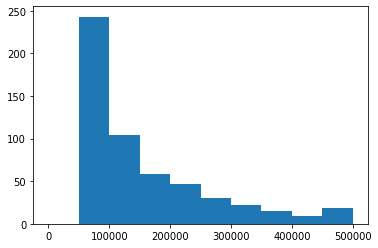

In [49]:
plt.hist(soccer_df.base_salary, bins=10, range= (0, 500000) ) 

(array([9., 4., 6., 4., 7., 3., 0.]),
 array([600000.        , 642857.14285714, 685714.28571429, 728571.42857143,
        771428.57142857, 814285.71428571, 857142.85714286, 900000.        ]),
 <a list of 7 Patch objects>)

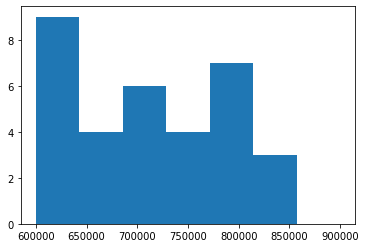

In [35]:
plt.hist(my_df.base_salary, bins=7, range= (600000, 900000) ) 

(array([12.,  5.,  0.,  2.,  0.,  1.,  5.]),
 array([1000000.        , 1714285.71428571, 2428571.42857143,
        3142857.14285714, 3857142.85714286, 4571428.57142857,
        5285714.28571429, 6000000.        ]),
 <a list of 7 Patch objects>)

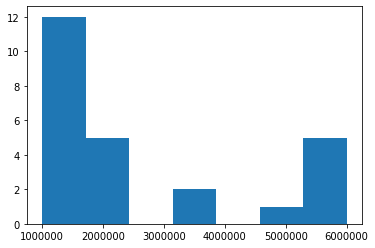

In [32]:
plt.hist(my_df.base_salary, bins=7, range= (1000000, 6000000) ) 

Making these graphs shows how many players from the MLS are paid a certain amount of money. In these graphs, the y axis shows the amount of players and the x axis is the amount of money they are paid.  

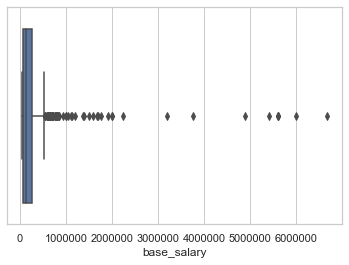

In [56]:
sns.set(style='whitegrid')

ax = sns.boxplot(x=my_df['base_salary']) 

# Now, I am going to examine some football data! 

In [17]:

football_df = pd.read_csv("football.csv",  encoding = "latin_1") 

In [39]:
football_df.head()

,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,free_agency
0,right-tackle,Trent Brown,Raiders,26,66000000,16500000,36250000,36250000,2023 UFA
1,right-tackle,JaÛªWuan James,Broncos,27,51000000,12750000,32000000,27000000,2023 UFA
2,right-tackle,Lane Johnson,Eagles,29,56250000,11250000,35500000,20862242,2022 Void
3,right-tackle,Ricky Wagner,Lions,30,47500000,9500000,29500000,17500000,2022 UFA
4,right-tackle,Rob Havenstein,Rams,26,32500000,8125000,16226365,9976365,2023 UFA


Now that I have the head of my data, I want to examine it a little closer.

In [41]:
football_df.index

RangeIndex(start=0, stop=5523, step=1)

Index tells me the amount of rows I have. 

I am going to look at the comlumns of data that I have. This will help me when I want to explore some of the columns. To show me what columns I have, I am going to use the columns function.  

In [44]:
football_df.columns

Index(['position', 'player', 'team', 'age', 'total_value', 'avg_year',
       'total_guaranteed', 'fully_guaranteed', 'free_agency'],
      dtype='object')

# Data Modeling for Football

### I am going to use the same functions above - describe and info to tell me important information for the football data. 

I am going to use my good friend describe to show me the min, max, average of total value, average yearly salary, total guaranteed and fully guaranteed. 

In [46]:
football_df.describe()

,age,total_value,avg_year,total_guaranteed,fully_guaranteed
count,5523.000000,5.523000e+03,5.523000e+03,5.523000e+03,5.523000e+03
mean,187.901141,7.786235e+06,2.250830e+06,3.803250e+06,3.095552e+06
std,549.109622,1.590476e+07,3.573839e+06,9.728381e+06,7.322756e+06
min,0.000000,1.050000e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,24.000000,1.350000e+06,5.853330e+05,0.000000e+00,0.000000e+00
50%,25.000000,2.075000e+06,6.900000e+05,9.000000e+04,8.705600e+04
75%,28.000000,4.673694e+06,2.000000e+06,1.600000e+06,1.500000e+06
max,2020.000000,1.500000e+08,3.500000e+07,1.070000e+08,9.450000e+07


Now, I am going to use my best friend info. Info tells me very interesting things - it tells me how many entries there are in the dataset and how many may be missing from the rows. 

In [45]:
football_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5523 entries, 0 to 5522
Data columns (total 9 columns):
position            5523 non-null object
player              5523 non-null object
team                5523 non-null object
age                 5523 non-null int64
total_value         5523 non-null int64
avg_year            5523 non-null int64
total_guaranteed    5523 non-null int64
fully_guaranteed    5523 non-null int64
free_agency         5518 non-null object
dtypes: int64(5), object(4)
memory usage: 388.4+ KB


Like I did with the soccer data I am going to use different ranges for the graphs so it looks less crowded. The ranges will be 0 to 500000, 600000 to 900000, 1000000 to 4000000, 5000000 to 6000000 and 8200000 to  9000000. 

(array([2581.,  253.,  135.,  141.,   79.,  131.,   85.,   21.,   35.,
          65.]),
 array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000., 500000.]),
 <a list of 10 Patch objects>)

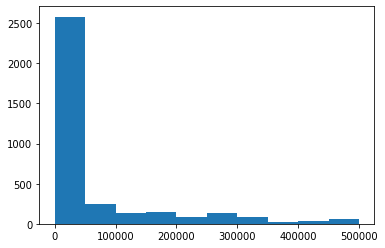

In [18]:
plt.hist(football_df.total_guaranteed, bins=10, range= (0, 500000) ) 

(array([35., 20., 23., 28., 27., 41., 30., 35., 24., 14., 16., 17., 15.,
         9., 18.]),
 array([600000., 620000., 640000., 660000., 680000., 700000., 720000.,
        740000., 760000., 780000., 800000., 820000., 840000., 860000.,
        880000., 900000.]),
 <a list of 15 Patch objects>)

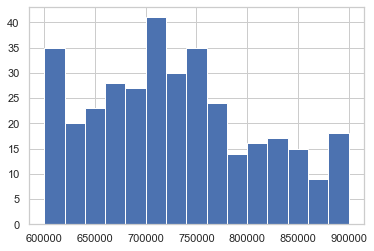

In [63]:
plt.hist(football_df.total_guaranteed, bins=15, range= (600000, 900000) )

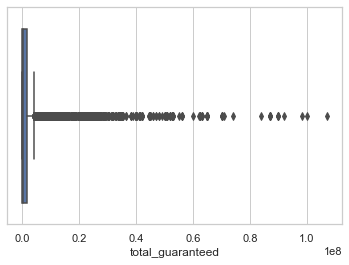

In [58]:
sns.set(style='whitegrid')

ax = sns.boxplot(x=football_df['total_guaranteed']) 

(array([73., 26., 38., 23., 18., 32., 32., 26., 35., 20., 38., 18., 33.,
        21., 45.]),
 array([1000000., 1200000., 1400000., 1600000., 1800000., 2000000.,
        2200000., 2400000., 2600000., 2800000., 3000000., 3200000.,
        3400000., 3600000., 3800000., 4000000.]),
 <a list of 15 Patch objects>)

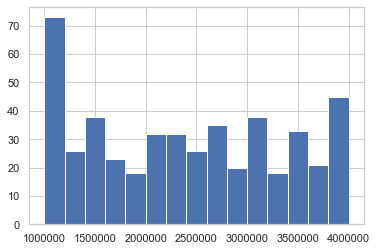

In [65]:
plt.hist(football_df.total_guaranteed, bins=15, range= (1000000, 4000000) )

(array([12.,  3., 14.,  0.,  1., 14.,  2., 10.,  0., 20.]),
 array([5000000., 5100000., 5200000., 5300000., 5400000., 5500000.,
        5600000., 5700000., 5800000., 5900000., 6000000.]),
 <a list of 10 Patch objects>)

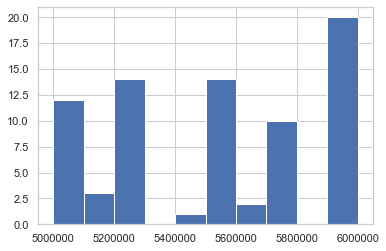

In [69]:
plt.hist(football_df.total_guaranteed, bins=10, range= (5000000, 6000000) )

(array([ 4.,  0.,  1., 10.,  2.,  6.,  4.,  6.,  1.,  8.]),
 array([8200000., 8280000., 8360000., 8440000., 8520000., 8600000.,
        8680000., 8760000., 8840000., 8920000., 9000000.]),
 <a list of 10 Patch objects>)

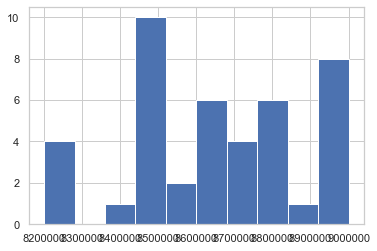

In [72]:
plt.hist(football_df.total_guaranteed, bins=10, range= (8200000, 9000000)) 

# Conclusions 

I found a lot of really interesting data from the datasets I explored. I found the highest salary for soccer was 7,167,500 dollars as of 2017 and the highest salary in the NFL from the time of that data set was 94,500,000 dollars over a certain number of years, but I looked it up and the highest paid player now is I am pretty sure, Russell Wilson who is paid 140,000,000 for four years. This isn't represented on the graphs because I think these stats are from awhile back. The least amount of money made by a player in the MLS was about 52,999 dollars and the min in the NFL was around 105,000 dollars. Looking at these numbers, I wonder why is there such a huge gap in between the pay in two leagues that are in the U.S including a couple of teams from Canada. It also makes me wonder about pay and if athletes should be making as much as they do. In addition, I think about women's athletes who like MLS soccer players are getting paid a fraction of what football players get paid. 


# Acknowledgements

Ms. Sconyers, thank you for helping me figure out the encodings and being available to meet. 

Myself: Having good labs to look back on. 

June: Checking in and helping me when I need help! 

Ziah: Also, checking in and helping me! 